## Data Ingestion

In [1]:
# Importing all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from zipfile import ZipFile

In [2]:
path = r"C:\Users\user322\Desktop\Machine_Learning\project_2\archive.student_performance.zip"

In [3]:
with ZipFile(path,"r") as f:
    f.printdir()

File Name                                             Modified             Size
StudentsPerformance.csv                        2025-11-12 18:11:12        57021


In [4]:
with ZipFile(path, "r") as f:
    with f.open("StudentsPerformance.csv") as file:
        df= pd.read_csv(file)

# Premilary Data Analysis

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.shape

(1000, 8)

In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# Exploratory Data Analysis

Descriptive Data Analysis

In [10]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [11]:
df.describe().columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
math score,1000.000000,66.089000,15.163080,0.000000,57.000000,66.000000,77.000000,100.000000
reading score,1000.000000,69.169000,14.600192,17.000000,59.000000,70.000000,79.000000,100.000000
writing score,1000.000000,68.054000,15.195657,10.000000,57.750000,69.000000,79.000000,100.000000


In [14]:
categorical_col= df.select_dtypes(include="object").columns
categorical_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [15]:
numerical_col=df.select_dtypes(include="number").columns
numerical_col

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [16]:
numerical_col.nunique()

3

In [17]:
for col in numerical_col:
    df[col].value_counts()
    print(df[col].value_counts())
    print("="*30)
    print()

math score
65    36
62    35
69    32
59    32
73    27
      ..
24     1
26     1
19     1
23     1
8      1
Name: count, Length: 81, dtype: int64

reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
26     1
28     1
23     1
40     1
Name: count, Length: 72, dtype: int64

writing score
74    35
70    33
68    31
73    28
62    27
      ..
19     1
35     1
15     1
30     1
23     1
Name: count, Length: 77, dtype: int64



Data Visualization

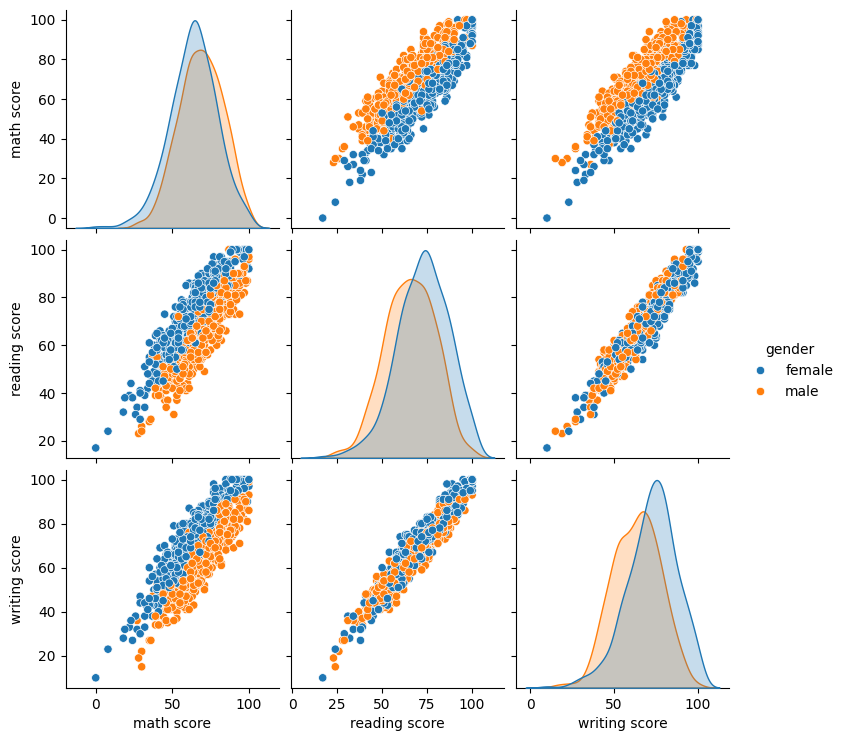

In [18]:
sns.pairplot(df,hue = 'gender')
plt.show()

Not enough numeric columns to generate a correlation heatmap.


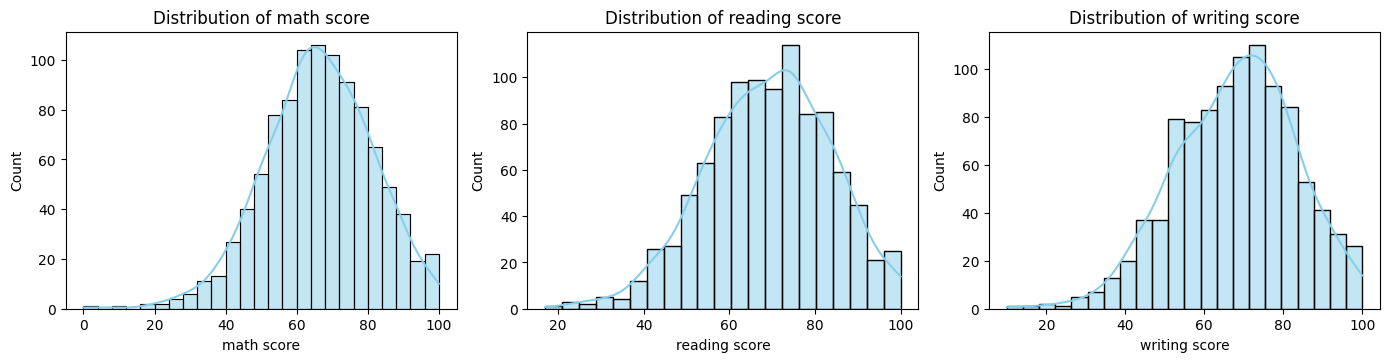

C:\Users\user322\AppData\Local\Temp\ipykernel_14384\1907173367.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='math score', palette='pastel')


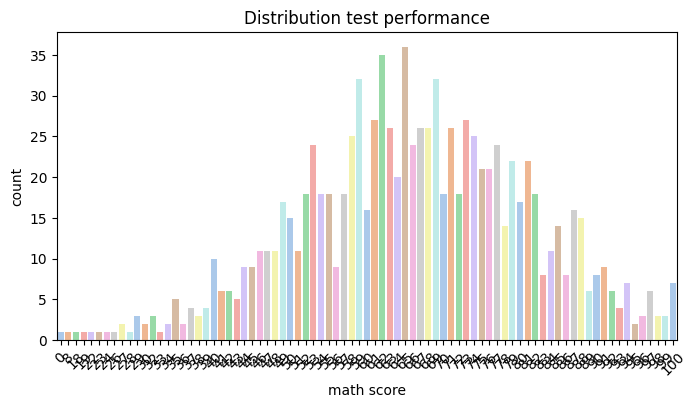

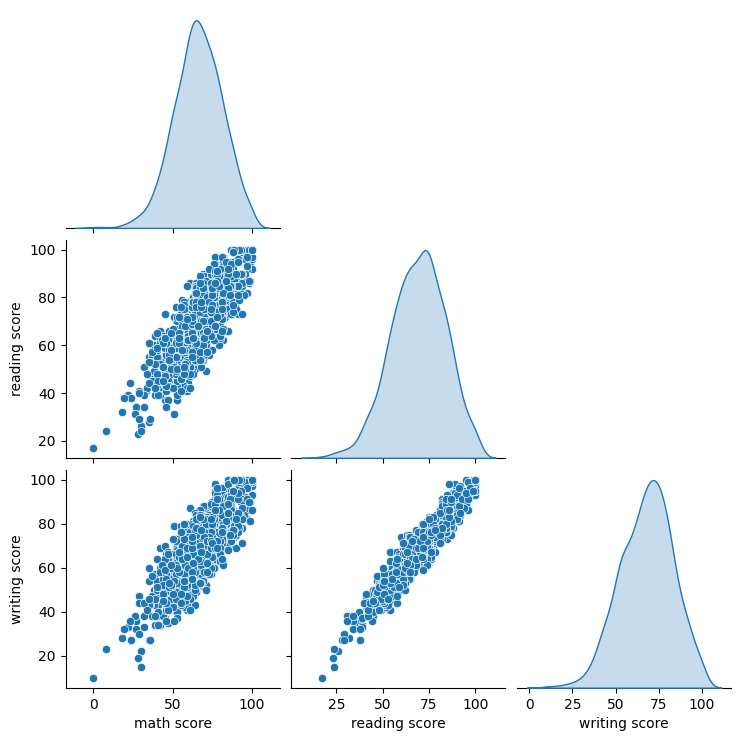

In [19]:
# Exploratory Data Analysis

# Let's examine the numeric features only for some analyses
numeric_df = df.select_dtypes(include=[np.number])

# If there are four or more numeric columns, display a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='viridis')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns to generate a correlation heatmap.')

# Plotting distributions for some key numeric variables
numeric_columns = ['math score', 'reading score', 'writing score']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Count plot for categorical variable: Payment_Method
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='math score', palette='pastel')
plt.title('Distribution test performance')
plt.xticks(rotation=45)
plt.show()

# Pair plot for a subset of features to visually inspect relationships
subset_features = ['math score', 'reading score', 'writing score']
sns.pairplot(df[subset_features].dropna(), diag_kind='kde', corner=True)
plt.show()

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


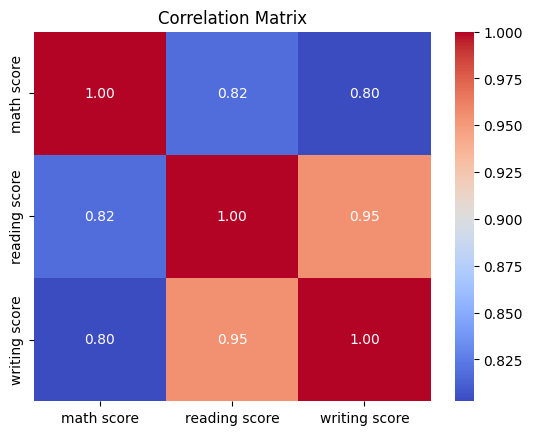

In [21]:

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.Figure(figsize=(8, 4))
plt.title("Correlation Matrix")
plt.show()

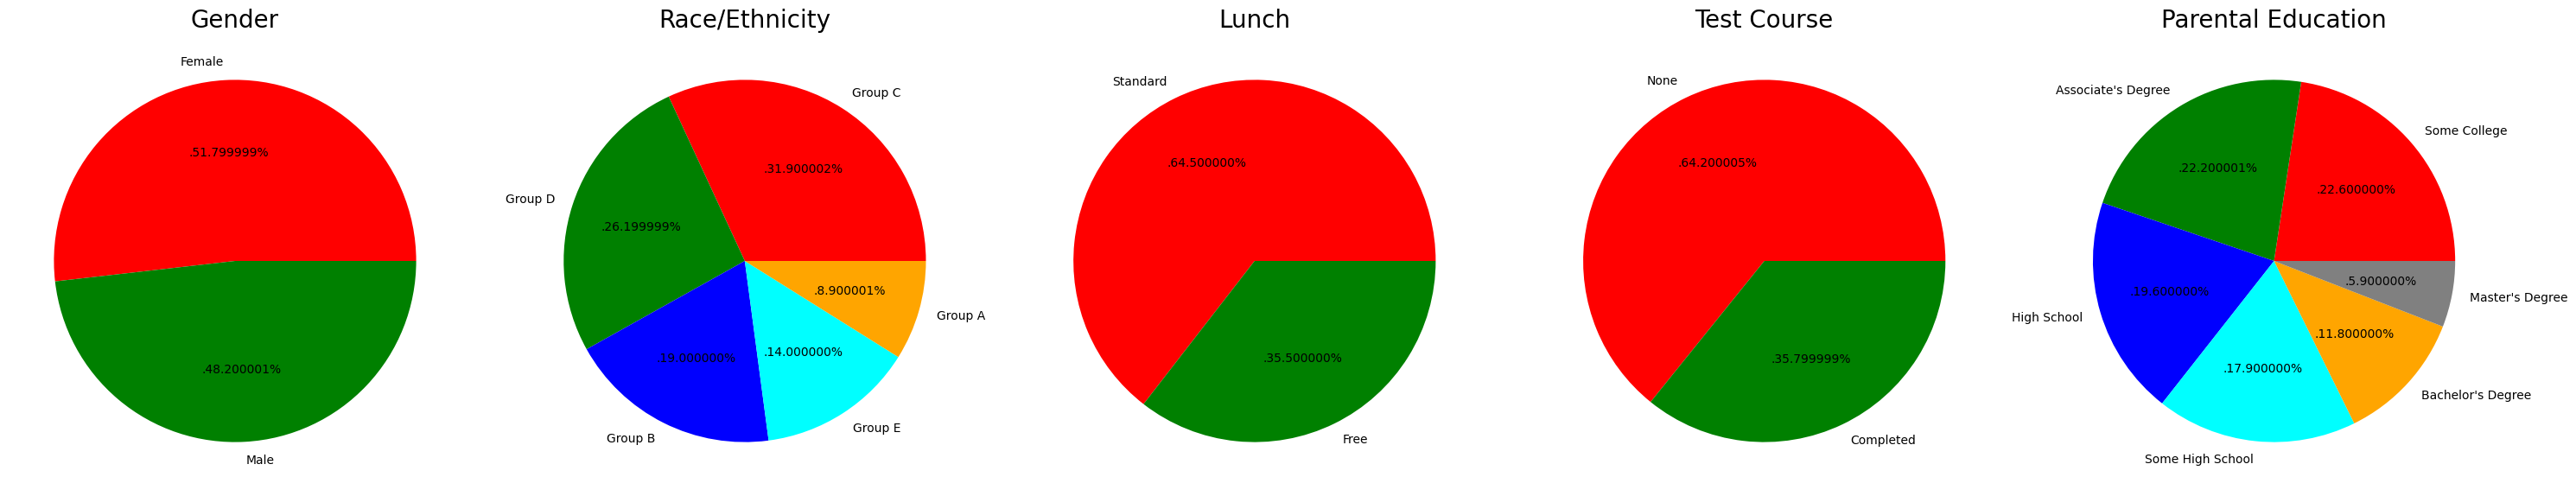

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()